Exploratory Data Analysis (EDA):
Load the Titanic dataset using Python's pandas library.
Check for missing values.
Explore data distributions using histograms and box plots.
Visualize relationships between features and survival using scatter plots and bar plots.
Data Preprocessing:
Impute missing values.
Encode categorical variables using one-hot encoding or label encoding. 
If needed you can apply more preprocessing methods on the given dataset.
Building Predictive Models:
Split the preprocessed dataset into training and testing sets.
Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.
Build predictive models using LightGBM and XGBoost algorithms.
Train the models on the training set and evaluate their performance on the testing set.
Use techniques like cross-validation and hyperparameter tuning to optimize model performance.
Comparative Analysis:
Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.
Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.


In [201]:
import pandas as pd 
import numpy as np

In [202]:
# load the dataset 
titanic_data_1=pd.read_csv("Titanic_train.csv",index_col=0)
titanic_data_2=pd.read_csv("Titanic_test.csv",index_col=0)

# Add a column to identify the dataset
titanic_data_1['Dataset'] = 'train'
titanic_data_2['Dataset'] = 'test'

#  Concatenate the datasets
titanic_data=pd.concat([titanic_data_1,titanic_data_2],ignore_index=True)

# dropping unnecessary column 
titanic_data=titanic_data.drop(["Name",'Cabin','Ticket'],axis=1)
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Dataset
0,0.0,3,male,22.0,1,0,7.2500,S,train
1,1.0,1,female,38.0,1,0,71.2833,C,train
2,1.0,3,female,26.0,0,0,7.9250,S,train
3,1.0,1,female,35.0,1,0,53.1000,S,train
4,0.0,3,male,35.0,0,0,8.0500,S,train
...,...,...,...,...,...,...,...,...,...
1304,NaN,3,male,NaN,0,0,8.0500,S,test
1305,NaN,1,female,39.0,0,0,108.9000,C,test
1306,NaN,3,male,38.5,0,0,7.2500,S,test
1307,NaN,3,male,NaN,0,0,8.0500,S,test


In [203]:
# checking for missing values 
titanic_data.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
Dataset       0
dtype: int64

In [204]:
# checking for duplicates 
titanic_data.duplicated().sum()

149

In [205]:
# dropping the duplicates 
titanic_data.drop_duplicates(inplace=True)

In [206]:
# details of data
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,780.000000,1160.000000,998.000000,1160.000000,1160.000000,1159.000000
mean,0.412821,2.237069,29.977876,0.512069,0.422414,35.916023
std,0.492657,0.853256,14.607853,0.967920,0.902024,54.210806
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,15.750000
75%,1.000000,3.000000,39.000000,1.000000,1.000000,34.375000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [207]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1160 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  780 non-null    float64
 1   Pclass    1160 non-null   int64  
 2   Sex       1160 non-null   object 
 3   Age       998 non-null    float64
 4   SibSp     1160 non-null   int64  
 5   Parch     1160 non-null   int64  
 6   Fare      1159 non-null   float64
 7   Embarked  1158 non-null   object 
 8   Dataset   1160 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 90.6+ KB


In [208]:
# Explore data distributions using histograms and box plots.
import matplotlib.pyplot as plt 
import seaborn as sns 

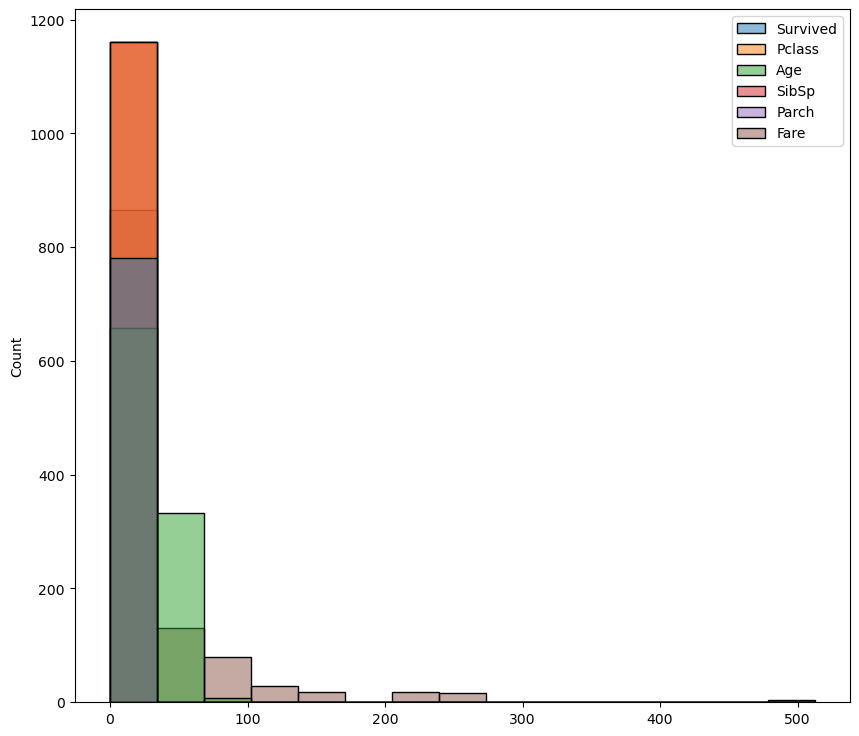

In [209]:
plt.figure(figsize=(10,9))
sns.histplot(data=titanic_data,bins=15)
plt.show()


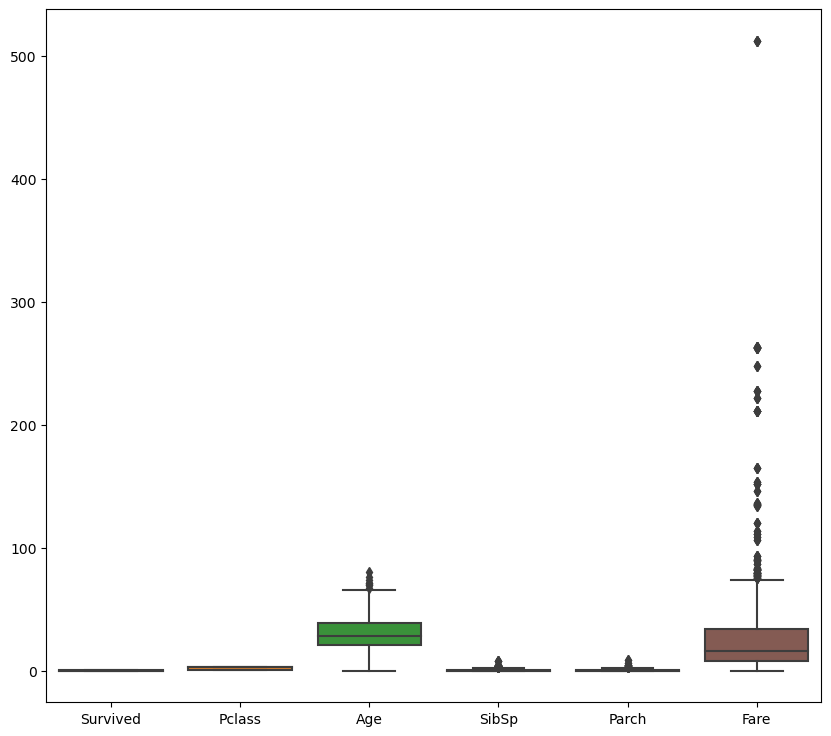

In [210]:
plt.figure(figsize=(10,9))
sns.boxplot(data=titanic_data.select_dtypes(include=["float64","int64"]))
plt.show()

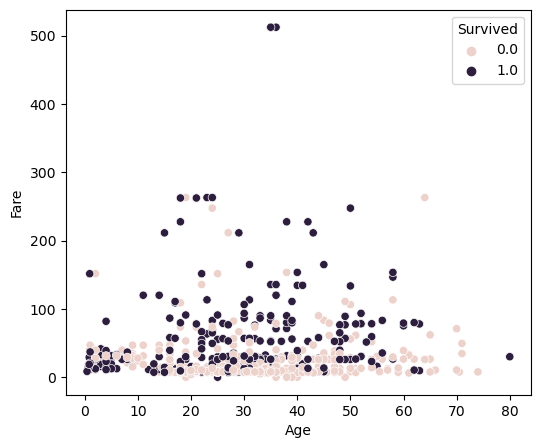

In [211]:
#  Visualize relationships between features and survival using scatter plots and bar plots
# Scatterplot:- Age vs fare 
plt.figure(figsize=(6,5))
sns.scatterplot(data=titanic_data,x="Age",y="Fare",hue="Survived")
plt.show()


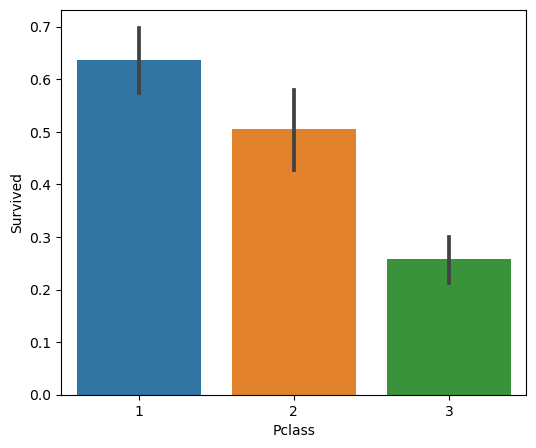

In [212]:
# Bar plot: Survival rate by Pclass
plt.figure(figsize=(6,5))
sns.barplot(data=titanic_data,x="Pclass",y='Survived')
plt.show()

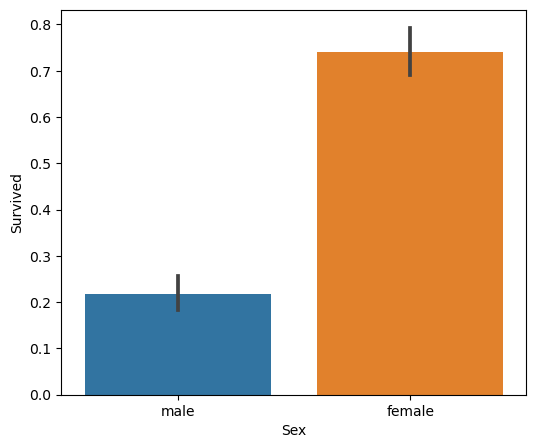

In [213]:
# barplot : Survival rate by Sex
plt.figure(figsize=(6,5))
sns.barplot(data=titanic_data,x="Sex",y="Survived")
plt.show()

# Data Preprocessing 

In [214]:
# Filling the missing values with mean,median & mode 

# imput missing values in 'Age' with median

titanic_data["Age"].fillna(titanic_data["Age"].median(),inplace=True)

# imput missing values in 'Embarked' with mode

titanic_data["Embarked"].fillna(titanic_data["Embarked"].mode()[0],inplace=True)


In [215]:
# drop the null values of FARE column 
titanic_data=titanic_data.dropna()

# now check the missing values
titanic_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Dataset     0
dtype: int64

In [217]:
from sklearn.preprocessing import OneHotEncoder ,LabelEncoder

In [218]:
# Encode using OnehotEncoder for 'Sex' , 'Embarked'
titanic_data_encoded=pd.get_dummies(titanic_data,columns=["Sex",'Embarked','Dataset'])


In [219]:
# new encoded data 
titanic_data_encoded

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Dataset_train
0,0.0,3,22.0,1,0,7.2500,0,1,0,0,1,1
1,1.0,1,38.0,1,0,71.2833,1,0,1,0,0,1
2,1.0,3,26.0,0,0,7.9250,1,0,0,0,1,1
3,1.0,1,35.0,1,0,53.1000,1,0,0,0,1,1
4,0.0,3,35.0,0,0,8.0500,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
885,0.0,3,39.0,0,5,29.1250,1,0,0,1,0,1
887,1.0,1,19.0,0,0,30.0000,1,0,0,0,1,1
888,0.0,3,28.0,1,2,23.4500,1,0,0,0,1,1
889,1.0,1,26.0,0,0,30.0000,0,1,1,0,0,1


In [220]:
# define features 
features=titanic_data_encoded.drop(["Survived"],axis=1)
features

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Dataset_train
0,3,22.0,1,0,7.2500,0,1,0,0,1,1
1,1,38.0,1,0,71.2833,1,0,1,0,0,1
2,3,26.0,0,0,7.9250,1,0,0,0,1,1
3,1,35.0,1,0,53.1000,1,0,0,0,1,1
4,3,35.0,0,0,8.0500,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
885,3,39.0,0,5,29.1250,1,0,0,1,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1,1
888,3,28.0,1,2,23.4500,1,0,0,0,1,1
889,1,26.0,0,0,30.0000,0,1,1,0,0,1


In [221]:
# define target 
target=titanic_data_encoded["Survived"]

In [222]:
# standardize the data 
from sklearn.preprocessing import StandardScaler

In [223]:
sta_sca=StandardScaler()
featured_standard_data=sta_sca.fit_transform(features)

In [224]:
# Convert the scaled data back to DataFrame to retain column names
features=pd.DataFrame(featured_standard_data,columns=features.columns)
features

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Dataset_train
0,0.882823,-0.552072,0.480406,-0.498746,-0.528033,-0.773538,0.773538,-0.497996,-0.283430,0.612912,0.0
1,-1.459361,0.614629,0.480406,-0.498746,0.697956,1.292762,-1.292762,2.008048,-0.283430,-1.631555,0.0
2,0.882823,-0.260397,-0.532342,-0.498746,-0.515109,1.292762,-1.292762,-0.497996,-0.283430,0.612912,0.0
3,-1.459361,0.395872,0.480406,-0.498746,0.349817,1.292762,-1.292762,-0.497996,-0.283430,0.612912,0.0
4,0.882823,0.395872,-0.532342,-0.498746,-0.512716,-0.773538,0.773538,-0.497996,-0.283430,0.612912,0.0
...,...,...,...,...,...,...,...,...,...,...,...
775,0.882823,0.687547,-0.532342,5.467850,-0.109211,1.292762,-1.292762,-0.497996,3.528211,-1.631555,0.0
776,-1.459361,-0.770828,-0.532342,-0.498746,-0.092459,1.292762,-1.292762,-0.497996,-0.283430,0.612912,0.0
777,0.882823,-0.114559,0.480406,1.887892,-0.217866,1.292762,-1.292762,-0.497996,-0.283430,0.612912,0.0
778,-1.459361,-0.260397,-0.532342,-0.498746,-0.092459,-0.773538,0.773538,2.008048,-0.283430,-1.631555,0.0


In [225]:
# split the training & testing model 
from sklearn.model_selection import train_test_split

In [226]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.7,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(546, 11)
(234, 11)
(546,)
(234,)


In [228]:
# install the xgboost & lightgbm 
! pip install xgboost
! pip install lightgbm

In [242]:
# train the xgbm model
import xgboost as xgb
xgb_model=xgb.XGBClassifier()
xgb_model.fit(x_train,y_train)
y_predict_xbgm=xgb_model.predict(x_test)

# Evaluate the Xgboost model 
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
accuracy_xbgm=accuracy_score(y_test,y_predict_xbgm)
precision_xbgm=precision_score(y_test,y_predict_xbgm)
recall_xbgm=recall_score(y_test,y_predict_xbgm)
f1_xgbm=f1_score(y_test,y_predict_xbgm)

# print the score value 
print(f'Accuracy_score of XGBM:- {accuracy_xbgm}')
print(f'Precision_score of XGBM:- {precision_xbgm}')
print(f'recall_score of XGBM:- {recall_xbgm}')
print(f'f1_score of XGBM:- {f1_xgbm}')

Accuracy_score of XGBM:- 0.7350427350427351
Precision_score of XGBM:- 0.6574074074074074
recall_score of XGBM:- 0.7395833333333334
f1_score of XGBM:- 0.696078431372549


In [286]:
# train the lgbm model
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(
    num_leaves=31,
    min_data_in_leaf=20,
    n_estimators=200,
    learning_rate=0.05,
    force_row_wise=True,
    force_col_wise=False
)
lgb_model.fit(x_train,y_train)
y_predict_lbgm=lgb_model.predict(x_test)

# Evaluate the lightgbm model 
accuracy_lbgm=accuracy_score(y_test,y_predict_lbgm)
precision_lbgm=precision_score(y_test,y_predict_lbgm)
recall_lbgm=recall_score(y_test,y_predict_lbgm)
f1_lgbm=f1_score(y_test,y_predict_lbgm)

# print the score value 
print(f'Accuracy_score of LGBM:- {accuracy_lbgm}')
print(f'Precision_score of LGBM:- {precision_lbgm}')
print(f'recall_score of LGBM:- {recall_lbgm}')
print(f'f1_score of LGBM:- {f1_lgbm}')


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Number of positive: 226, number of negative: 320
[LightGBM] [Info] Total Bins 204
[LightGBM] [Info] Number of data points in the train set: 546, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.413919 -> initscore=-0.347786
[LightGBM] [Info] Start training from score -0.347786
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

In [302]:
# Hyperparameter tuning for LightGBM
from sklearn.model_selection import GridSearchCV
light_param_grid={
    'n_estimators':[100,200],
    'learning_rate':[0.01,0.05,0.1],
    'num_leaves':[31,50]
}

In [303]:
lbm_grid=GridSearchCV(lgb_model,light_param_grid,cv=5,scoring="f1")

In [304]:
lbm_grid.fit(x_train,y_train)

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Number of positive: 180, number of negative: 256
[LightGBM] [Info] Total Bins 179
[LightGBM] [Info] Number of data points in the train set: 436, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.412844 -> initscore=-0.352221
[LightGBM] [Info] Start training from score -0.352221
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

GridSearchCV(cv=5,
             estimator=LGBMClassifier(force_col_wise=False, force_row_wise=True,
                                      learning_rate=0.05, min_data_in_leaf=20,
                                      n_estimators=200),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [100, 200], 'num_leaves': [31, 50]},
             scoring='f1')

In [305]:
# finding the best params  for lgbm
print(f'Best parameters & score for lbgm:{lbm_grid.best_params_,lbm_grid.best_score_}')
# apply this model into test set 
lbm_grid_model=lbm_grid.best_estimator_
y_predict_best_lbm=lbm_grid_model.predict(x_test)

Best parameters & score for lbgm:({'learning_rate': 0.1, 'n_estimators': 100, 'num_leaves': 31}, 0.745373422409446)
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


In [317]:
accuracy_best_Score_lgm=accuracy_score(y_test,y_predict_best_lbm)
precision_best_score_lgm=precision_score(y_test,y_predict_best_lbm)
recall_best_score_lgm=recall_score(y_test,y_predict_best_lbm)
f1_best_score_lgm=f1_score(y_test,y_predict_best_lbm)
print(f'Accuracy_score by using best_params:{accuracy_best_Score}')
print(f'Precision_score by using best_params:{precision_best_score}')
print(f'Recall_Score by using best_params:{recall_best_score}')
print(f'F1_score by using best_params:{f1_best_score}')

Accuracy_score by using best_params:0.8076923076923077
Precision_score by using best_params:0.8072289156626506
Recall_Score by using best_params:0.6979166666666666
F1_score by using best_params:0.7486033519553071


In [318]:
xbm_params={
    'n_estimators':[100,200],
    'learning_rate':[0.01,0.05,0.1],
     'max_leaves' :[3,5,7]
    
}

In [319]:
xgm_grid=GridSearchCV(xgb_model,xbm_params,cv=5,scoring='f1')
xgm_grid.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_leaves': [3, 5, 7], 'n_estimators': [100, 200]},
             scoring='f1')

In [320]:
# finding the best params  for xgbm
print(f'Best parameters & score of xgbm:{xgm_grid.best_params_,xgm_grid.best_score_}')
# apply this model into test set 
xgm_grid_model=xgm_grid.best_estimator_
y_predict_best_xgm=xgm_grid_model.predict(x_test)

Best parameters & score of xgbm:({'learning_rate': 0.1, 'max_leaves': 3, 'n_estimators': 100}, 0.7538354695348096)


In [321]:
accuracy_best_Score_xgm=accuracy_score(y_test,y_predict_best_xgm)
precision_best_score_xgm=precision_score(y_test,y_predict_best_xgm)
recall_best_score_xgm=recall_score(y_test,y_predict_best_xgm)
f1_best_score_xgm=f1_score(y_test,y_predict_best_xgm)
print(f'Accuracy_score by using best_params:{accuracy_best_Score}')
print(f'Precision_score by using best_params:{precision_best_score}')
print(f'Recall_Score by using best_params:{recall_best_score}')
print(f'F1_score by using best_params:{f1_best_score}')

Accuracy_score by using best_params:0.8076923076923077
Precision_score by using best_params:0.8072289156626506
Recall_Score by using best_params:0.6979166666666666
F1_score by using best_params:0.7486033519553071


In [329]:
# performance comparison
metrics=["Accuracy","Precision","Recall","F1"]
lgm_scores=[accuracy_best_Score_lgm,precision_best_score_lgm,recall_best_score_lgm,f1_best_score_lgm]
xgm_scores=[accuracy_best_Score_xgm,precision_best_score_xgm,recall_best_score_xgm,f1_best_score_xgm]

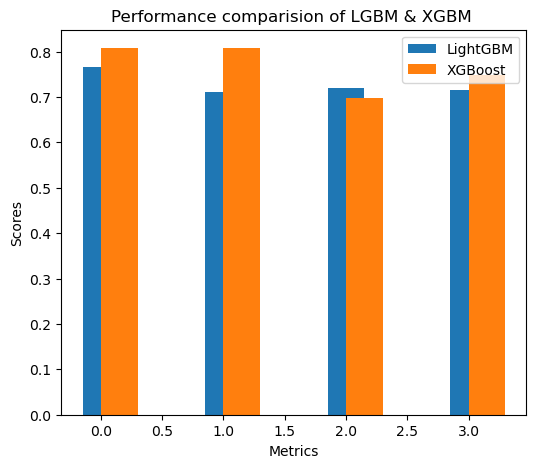

In [342]:
# plotting the figure 
plt.figure(figsize=(6,5))
x=range(len(metrics))
plt.bar(x, lgm_scores, width=0.3, label='LightGBM',align="center")
plt.bar(x, xgm_scores, width=0.3, label='XGBoost',align='edge')
plt.xlabel("Metrics")
plt.ylabel("Scores")
plt.title("Performance comparision of LGBM & XGBM ")
plt.legend()
plt.show()